# DECON-EQTL PART1: Prepping files to run with Decon-eQTL 
## (in lngnode2)

### Sept 2, 2020

## prepping per chromosome

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cohort = 'nabec'
CHROMOSOMES=[str(x) for x in list(range(1,23))]
WRKDIR = f'/labshare/anni/eqtl/Decon-eQTL/{cohort}'
#WRKDIR = '/data/LNG/anni/decon-eqtl/ppmi'
fract_in = '/labshare/anni/deconvolution/scaden'
#expr_in = 
geno_in = f'/labshare/raph/eqtl/{cohort}/genotypes/nabec.aug2020.chr*.p*'
expr_in = f'/labshare/raph/eqtl/{cohort}/expression/nabec.aug2020.chr*.pheno'
info_in = f'/labshare/raph/eqtl/{cohort}/sample_info/'


expr_samples = f'/labshare/anni/deconvolution/{cohort}/{cohort}_gene_numreads.sf'
fract_file = 'scaden_predictions_nabec_rosmap_seeded_NOOAMv4_200.txt'
info_file = 'nabec.aug2020.sample_info.txt'
subset_samples_file = 'nabec.deconeqtl.subset.samples.txt'
gencode_file = '/labshare/anni/gencode/gencode.v32.transcripts.txt'



## check sample info

In [ ]:
info_df = pd.read_csv(f'{info_in}/{info_file}')
info_df.head()

## Prepping genotype files

#### got files from /labseq/projects/nabec/wgs/genotypes/hg38
#### only copied over chr22, need to copy rest

### copying over genotypes per chrom

In [4]:
## copy over all chrom files
### from neurod.freeze9 files from /labshare/raph
cmd = f'mkdir {WRKDIR}/genotypes'
!{cmd}
cmd = f'cp {geno_in} {WRKDIR}/genotypes/'
!{cmd}


In [1]:
##copy to biowulf
#!cp /labshare/anni/eqtl/ppmi/plink/genotypes/* /labshare/anni/scp /Decon-eQTL/ppmi/genotypes/
#!scp mooreank@156.40.49.21:/labshare/anni/eqtl/Decon-eQTL/ppmi/genotypes/* /data/LNG/anni/decon-eqtl

### extract cohort samples from file

#### 

In [9]:

## getting list of ppmi samples form psam file 
print('run in terminal:')

##directory: /labsharea/anni/eqtl/Decon-eQTL/nabec/genotypes
# print ('awk '"'$1 ~ "'"PP-"'" {print $1"'" "'"$2}'"' nabec.apr.2018.chr22.fam > nabec.apr.2018.samples')
# print('')
for chrom in CHROMOSOMES:
    #print("")
    #print(f'plink2 --pfile neurod.freeze9.chr{chrom} --keep neurod.freeze9.ppmi.samples --maf 0.05 --geno 0.05 --make-pgen --out neurod.freeze9.ppmi.maf05geno05.chr{chrom}.samples &')
    print(f'plink2 --pfile nabec.aug2020.chr{chrom} --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr{chrom}.geno05maf05hwe000001 &')
    
    

run in terminal:
plink2 --pfile nabec.aug2020.chr1 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr1.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr2 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr2.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr3 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr3.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr4 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr4.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr5 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr5.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr6 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr6.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr7 --silent --geno 0.05 --maf 0.05 --hwe 0.000001 --make-pgen --out nabec.aug2020.chr7.geno05maf05hwe00000

In [23]:
## converting plink genotype files to dosage files 
print('run in terminal:')
for chrom in CHROMOSOMES:
    print(f'plink2 --pfile nabec.aug2020.chr{chrom}.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr{chrom}.geno05maf05hwe000001 &')
      

run in terminal:
plink2 --pfile nabec.aug2020.chr1.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr1.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr2.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr2.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr3.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr3.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr4.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr4.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr5.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr5.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr6.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr6.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr7.geno05maf05hwe000001 --silent --export A-transpose --out nabec.aug2020.chr7.geno05maf05hwe000001 &
plink2 --pfile nabec.aug2020.chr8.geno05maf05hwe0000

### separating pheno data per chrom (expression matrix) or just copy over

In [25]:
#!cp /labshare/anni/eqtl/ppmi/plink/expression/ppmi.V08.chr* /labshare/anni/eqtl/Decon-eQTL/ppmi/expression/
# !cp /labshare/anni/eqtl/ppmi/plink/expression/ppmi.V08.chr19* /labshare/anni/eqtl/Decon-eQTL/ppmi/expression/
# !cp /labshare/anni/eqtl/ppmi/plink/expression/ppmi.V08.chr20* /labshare/anni/eqtl/Decon-eQTL/ppmi/expression/
# !cp /labshare/anni/eqtl/ppmi/plink/expression/ppmi.V08.chr21* /labshare/anni/eqtl/Decon-eQTL/ppmi/expression/
# !cp /labshare/anni/eqtl/ppmi/plink/expression/ppmi.V08.chr22* /labshare/anni/eqtl/Decon-eQTL/ppmi/expression/
cmd = f'mkdir {WRKDIR}/expression'
!{cmd}

cmd = f'cp {expr_in} {WRKDIR}/expression/'
!{cmd}

## Get overlapping samples

In [ ]:
# expr_df = pd.read_csv(f'{WRKDIR}/expression/nabec.aug2020.chr22.pheno',sep='\t')
# expr_samples = expr_df['IID'].tolist()
# print(f'expr samples: {len(expr_samples)}')
# print(expr_df.shape)
# expr_df.head()

In [61]:
expr_df = pd.read_csv(f'{WRKDIR}/expression/nabec.aug2020.chr22.pheno',sep='\t')
expr_samples = expr_df['IID'].tolist()
print(f'expr samples: {len(expr_samples)}')
#expr_df.head()

geno_df = pd.read_csv(f'{WRKDIR}/genotypes/nabec.aug2020.chr22.geno05maf05hwe000001.traw', sep='\t')
del geno_df['CHR']
del geno_df['SNP']
del geno_df['POS']
del geno_df['COUNTED']
del geno_df['ALT']
del geno_df['(C)M']
geno_columns = geno_df.columns.tolist()
geno_samples = []
for item in geno_columns:
    name = item.split('_')[0]
    geno_samples.append(name)
print(f'geno samples: {len(geno_samples)}')


overlap_samples = list(set(expr_samples) & set(geno_samples))
print(f'overlapping samples: {len(overlap_samples)}')


with open(f'{WRKDIR}/{subset_samples_file}', 'w') as output:
    for x in overlap_samples:
        output.write(str(x) + '\n')

expr samples: 278
geno samples: 328
overlapping samples: 248


## Finish prepping genotype and prep expression, subset by samples

In [26]:
##functions

import pandas as pd

def format_geno(chrom):
    in_file = f'{WRKDIR}/genotypes/nabec.aug2020.chr{chrom}.geno05maf05hwe000001.traw'
    out_file = f'{WRKDIR}/genotypes/nabec.aug2020.chr{chrom}.geno05maf05hwe000001.format.traw'
    change = pd.read_csv(in_file, sep='\t')

    #change.replace(dict(column1={'\{_*\}': ''}), regex=True)
    #change.to_csv(f'{WRKDIR}/neurod.freeze9.ppmi.maf05geno05.chr22.dosage.trans.strip.traw.test', sep='\t')

    ##make SNP column CHR:POS:REF:ALT
    change['CHR'] = "chr"+change['CHR'].astype(str)
    change['POS'] = change['POS'].astype(str)
    change['COUNTED'] = change['COUNTED'].astype(str)
    change['ALT'] = change['ALT'].astype(str)
    change['SNP'] = change["CHR"]+':'+change["POS"]+":"+change["COUNTED"]+":"+change["ALT"]

    ##delete extra columns
    del change['CHR']
    del change['(C)M']
    del change['POS']
    del change['COUNTED']
    del change['ALT']

    ## get rid of SNP column header
    #change.replace(dict(SNP={'\{_*\}': ''}), regex=True)
    change = change.rename(columns = {'SNP':''})

    ##replace column names 
    change_orig = pd.DataFrame(change.columns.tolist())
    change_orig.columns = ['old']
    change_orig['new'] = change_orig.old.str.split('_').str[0]


    id_dict = dict(zip(change_orig['old'], change_orig['new'])) 
    #rename the features/columns using the dict (mapping)

    change.rename(columns=id_dict, inplace=True)
    geno_samples = change.columns.tolist()

    change.index = change['']
    del change['']
    change.head()
    #return change
    print(f'geno chrom{chrom}: '+str(change.shape))
    change.to_csv(out_file, sep='\t')

def subset_by_samples_geno(sample_incl_list, chrom):
    in_file = f'{WRKDIR}/genotypes/nabec.aug2020.chr{chrom}.geno05maf05hwe000001.format.traw'
    out_file = f'{WRKDIR}/genotypes/nabec.aug2020.chr{chrom}.geno05maf05hwe000001.subset.traw'
    change = pd.read_csv(in_file, sep='\t',index_col=0)
    ### subset geno over overlapping samples
    change = change[[c for c in change.columns if c in sample_incl]]
    # geno_samples = geno_samples.sort()
    # print(geno_samples[:5])
    change.head()

    print(f'geno subset chrom{chrom}: '+str(change.shape))
    #print(change.head())
    change.to_csv(out_file, sep='\t', index=True)


    
def format_exp(chrom):
    in_file = f'{WRKDIR}/expression/nabec.aug2020.chr{chrom}.pheno'
    out_file = f'{WRKDIR}/expression/nabec.aug2020.chr{chrom}.format.pheno'
    #exp_df = pd.read_csv(f'{WRKDIR}/expression/ppmi.V08.chr{chrom}.norm.umap_adj.pheno',sep='\t', index_col=0)
    exp_df = pd.read_csv(in_file,sep='\t', index_col=0)
    del exp_df['IID']
    exp_df.index.name = ''
    #exp_samples = exp_df.index.tolist() 
    print(f'expression chrom{chrom}: '+str(exp_df.shape))
    exp_df = exp_df.T
    #exp_df.head()   
    #return exp_df
    exp_df.to_csv(out_file,sep='\t')

    


def subset_by_samples_exp(sample_incl_list, chrom):
    ##subset expression df
    in_file = f'{WRKDIR}/expression/nabec.aug2020.chr{chrom}.format.pheno'
    out_file = f'{WRKDIR}/expression/nabec.aug2020.chr{chrom}.subset.pheno'
    exp_df = pd.read_csv(in_file,sep='\t', index_col=0)
    #exp_df = exp_df[exp_df.index.isin(sample_incl)]
    exp_df = exp_df[[c for c in exp_df.columns if c in sample_incl]]
    #exp_df = exp_df.reindex(geno_samples)
    exp_df = exp_df.reindex(sorted(exp_df.columns), axis=1)
    print(f'expression subset chrom{chrom}: '+str(exp_df.shape))
    exp_df.to_csv(out_file,sep='\t',index=True)

In [75]:
##get list of samples to subset files
# sample_incl = list(set(geno_samples) & set(exp_samples) & set(fract_samples))
# len(sample_incl)

# with open('/labshare/anni/eqtl/Decon-eQTL/ppmi/subset.ppmi.samples.txt', 'w') as f:
#     for item in sample_incl:
#         f.write("%s\n" % item)

sample_df = pd.read_csv(f'{WRKDIR}/nabec.deconeqtl.subset.samples.txt', sep='\t', header=None)
#sample_df.head()
sample_incl = sample_df[0].tolist()
len(sample_incl)

248

### Run format and subsetting of genotype and expression files based on subset sample list

In [76]:

CHROMOSOMES_test=[str(x) for x in list(range(1,23))]
#chrom = 1
for chrom in CHROMOSOMES_test:
    format_geno(chrom)
    subset_by_samples_geno(sample_incl, chrom)
    format_exp(chrom)
    subset_by_samples_exp(sample_incl, chrom)
    

geno chrom1: (457996, 328)
geno subset chrom1: (457996, 248)
expression chrom1: (278, 1675)
expression subset chrom1: (1675, 248)
geno chrom2: (495685, 328)
geno subset chrom2: (495685, 248)
expression chrom2: (278, 1185)
expression subset chrom2: (1185, 248)
geno chrom3: (428129, 328)
geno subset chrom3: (428129, 248)
expression chrom3: (278, 1024)
expression subset chrom3: (1024, 248)
geno chrom4: (440387, 328)
geno subset chrom4: (440387, 248)
expression chrom4: (278, 671)
expression subset chrom4: (671, 248)
geno chrom5: (386004, 328)
geno subset chrom5: (386004, 248)
expression chrom5: (278, 853)
expression subset chrom5: (853, 248)
geno chrom6: (405433, 328)
geno subset chrom6: (405433, 248)
expression chrom6: (278, 880)
expression subset chrom6: (880, 248)
geno chrom7: (351230, 328)
geno subset chrom7: (351230, 248)
expression chrom7: (278, 853)
expression subset chrom7: (853, 248)
geno chrom8: (327585, 328)
geno subset chrom8: (327585, 248)
expression chrom8: (278, 647)
express

## loading sample fractions

(657, 6)


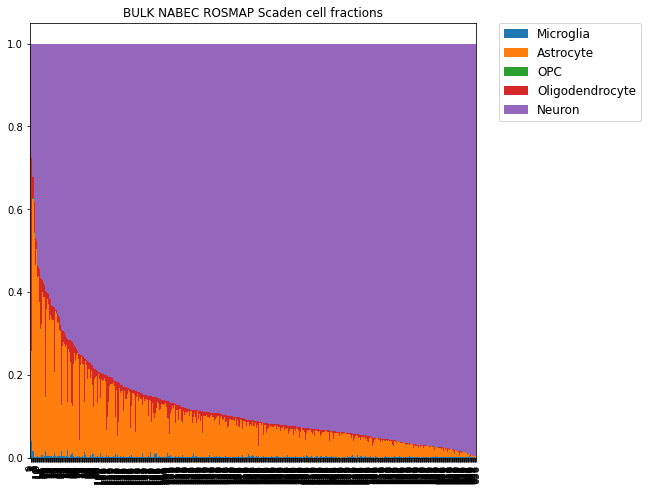

In [12]:
scaden = pd.read_csv(f'{fract_in}/{fract_file}', sep='\t')
print(scaden.shape)
scaden.set_index(['Unnamed: 0'], drop=True, inplace=True)
scaden.head()

scaden.sort_values(by=['Neuron', \
                                          'Oligodendrocyte']).plot.bar(stacked=True, \
                                                                   use_index=False, \
                                                                   grid=False, width=1, \
                                                                   figsize=(8,8),
                                                                    xticks=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,prop={'size': 12})
plt.title('BULK NABEC ROSMAP Scaden cell fractions')
plt.show()

#plt.savefig(f'{WRKDIR}/nabec_rosmap_bulk_scaden_brain_elevated_extra_cell_fractions.png')

In [78]:
fract_df = pd.read_csv(f'{fract_in}/{fract_file}',sep='\t', index_col=0)
fract_df = fract_df * 100
fract_df.head()

,Microglia,Astrocyte,OPC,Oligodendrocyte,Neuron
SM-CTDSC,0.140306,12.183997,0.007635,1.095105,86.572960
SM-CJGMZ,0.109217,12.782510,0.005036,1.072486,86.030750
SM-CJIXK,0.213305,25.155708,0.013709,1.590663,73.026610
SM-CJIZR,0.198984,12.740023,0.009282,0.874360,86.177350
SM-CTEET,0.248917,22.235920,0.016070,1.782549,75.716543


In [81]:
# samples_df = pd.read_csv(expr_samples, sep='\t', index_col=0)
# samples_list = samples_df.columns
# print(len(samples_list))

cohort_fract_df = fract_df[fract_df.index.isin(sample_incl)]
print(cohort_fract_df.shape)
cohort_fract_df.to_csv(f'{WRKDIR}/nabec.scaden.v4_200.cell_fract.subset.txt',sep='\t',index=True)
cohort_fract_df.head()
# df.index.isin([1,3])

(248, 5)


,Microglia,Astrocyte,OPC,Oligodendrocyte,Neuron
SH-00-34,0.275147,5.734295,0.012469,0.078024,93.900067
SH-00-38,0.257504,5.944761,0.014112,0.944214,92.839410
SH-00-49,0.363019,8.467063,0.019880,1.950174,89.199860
SH-01-31,0.236132,6.409678,0.018348,0.243097,93.092746
SH-01-37,0.371429,6.352154,0.014456,0.155819,93.106145


(248, 5)


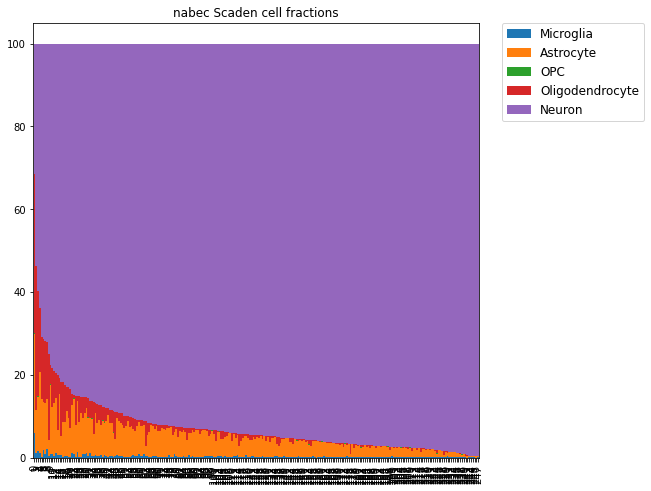

In [80]:
scaden = cohort_fract_df
print(scaden.shape)
#scaden.set_index(['Unnamed: 0'], drop=True, inplace=True)
scaden.head()

scaden.sort_values(by=['Neuron', \
                                          'Oligodendrocyte']).plot.bar(stacked=True, \
                                                                   use_index=False, \
                                                                   grid=False, width=1, \
                                                                   figsize=(8,8),
                                                                    xticks=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,prop={'size': 12})
plt.title(f'{cohort} Scaden cell fractions')
plt.show()

#plt.savefig(f'{WRKDIR}/nabec_rosmap_bulk_scaden_brain_elevated_extra_cell_fractions.png')

## transfer files to biowulf

In [97]:
WRKDIR

'/labshare/anni/eqtl/Decon-eQTL/nabec'